In [1]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report, auc
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
scl_intr_df = pd.read_csv("(before) Social interaction diversity features.csv")

In [3]:
scl_intr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 11 columns):
Actor              49739 non-null int64
A_Acc              49739 non-null int64
GuildAct_count     49739 non-null int64
GuildJoin_count    49739 non-null int64
a126_5_Degree      49739 non-null int64
a134_5_Degree      49739 non-null int64
a219_5_Degree      49739 non-null int64
a229_5_Degree      49739 non-null int64
a247_5_Degree      49739 non-null int64
acha_5_Degree      49739 non-null int64
Type               49739 non-null object
dtypes: int64(10), object(1)
memory usage: 4.2+ MB


In [4]:
scl_intr_df.head()

,Actor,A_Acc,GuildAct_count,GuildJoin_count,a126_5_Degree,a134_5_Degree,a219_5_Degree,a229_5_Degree,a247_5_Degree,acha_5_Degree,Type
0,1047,6482393,1,0,111,23,22,6,1,48,Human
1,1049,6275719,2,0,17,2,9,5,0,0,Human
2,1120,6596993,0,0,6,4,1,0,0,0,Human
3,1164,6670686,0,0,7,0,2,2,0,11,Human
4,1184,4220231,0,0,10,4,2,3,0,0,Human


In [7]:
scl_intr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actor,49739.0,3.449409e+05,1.276346e+05,1047.0,272154.0,400583.0,442200.5,472898.0
A_Acc,49739.0,8.483737e+06,1.963675e+06,0.0,6878566.0,8290550.0,10433333.5,11369388.0
GuildAct_count,49739.0,7.466576e-01,1.224676e+00,0.0,0.0,0.0,1.0,11.0
GuildJoin_count,49739.0,2.789562e-01,4.484904e-01,0.0,0.0,0.0,1.0,1.0
a126_5_Degree,49739.0,4.320529e+01,8.080822e+01,0.0,1.0,7.0,48.0,1172.0
a134_5_Degree,49739.0,8.816965e+00,1.779717e+01,0.0,0.0,2.0,10.0,664.0
a219_5_Degree,49739.0,9.188162e+00,1.552076e+01,0.0,1.0,4.0,10.0,285.0
a229_5_Degree,49739.0,7.485253e+00,1.323755e+02,0.0,2.0,4.0,7.0,10471.0
a247_5_Degree,49739.0,8.461167e-01,9.021224e+00,0.0,0.0,0.0,0.0,874.0
acha_5_Degree,49739.0,1.303404e+01,3.504493e+01,0.0,0.0,0.0,7.0,899.0


In [8]:
# Renaming columns in readable format to understand what each column represents.
scl_intr_df_copy = scl_intr_df.copy()

col_names=['Actor','Aion_Account','Guild_Action_Count', 'Guild_Join_Count','Party_Play','Friendship','Trade','Whisper','Mail',
           'Shop','Player_Type']
scl_intr_df_copy.columns=col_names
scl_intr_df.columns=col_names

In [9]:
scl_intr_df.head()

,Actor,Aion_Account,Guild_Action_Count,Guild_Join_Count,Party_Play,Friendship,Trade,Whisper,Mail,Shop,Player_Type
0,1047,6482393,1,0,111,23,22,6,1,48,Human
1,1049,6275719,2,0,17,2,9,5,0,0,Human
2,1120,6596993,0,0,6,4,1,0,0,0,Human
3,1164,6670686,0,0,7,0,2,2,0,11,Human
4,1184,4220231,0,0,10,4,2,3,0,0,Human


In [10]:
scl_intr_df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actor,49739.0,3.449409e+05,1.276346e+05,1047.0,272154.0,400583.0,442200.5,472898.0
Aion_Account,49739.0,8.483737e+06,1.963675e+06,0.0,6878566.0,8290550.0,10433333.5,11369388.0
Guild_Action_Count,49739.0,7.466576e-01,1.224676e+00,0.0,0.0,0.0,1.0,11.0
Guild_Join_Count,49739.0,2.789562e-01,4.484904e-01,0.0,0.0,0.0,1.0,1.0
Party_Play,49739.0,4.320529e+01,8.080822e+01,0.0,1.0,7.0,48.0,1172.0
Friendship,49739.0,8.816965e+00,1.779717e+01,0.0,0.0,2.0,10.0,664.0
Trade,49739.0,9.188162e+00,1.552076e+01,0.0,1.0,4.0,10.0,285.0
Whisper,49739.0,7.485253e+00,1.323755e+02,0.0,2.0,4.0,7.0,10471.0
Mail,49739.0,8.461167e-01,9.021224e+00,0.0,0.0,0.0,0.0,874.0
Shop,49739.0,1.303404e+01,3.504493e+01,0.0,0.0,0.0,7.0,899.0


In [7]:
# Change Type as Category
scl_intr_df_copy.Player_Type = scl_intr_df_copy.Player_Type.astype('category')

In [8]:
# Creating a numerical field for Type
scl_intr_df_copy.Player_Type.replace({'Human': 0, 'Bot': 1}, inplace=True)

In [9]:

type_dict = {0 : 'Human', 1: 'Bot'}

# Pairplot Analysis 

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


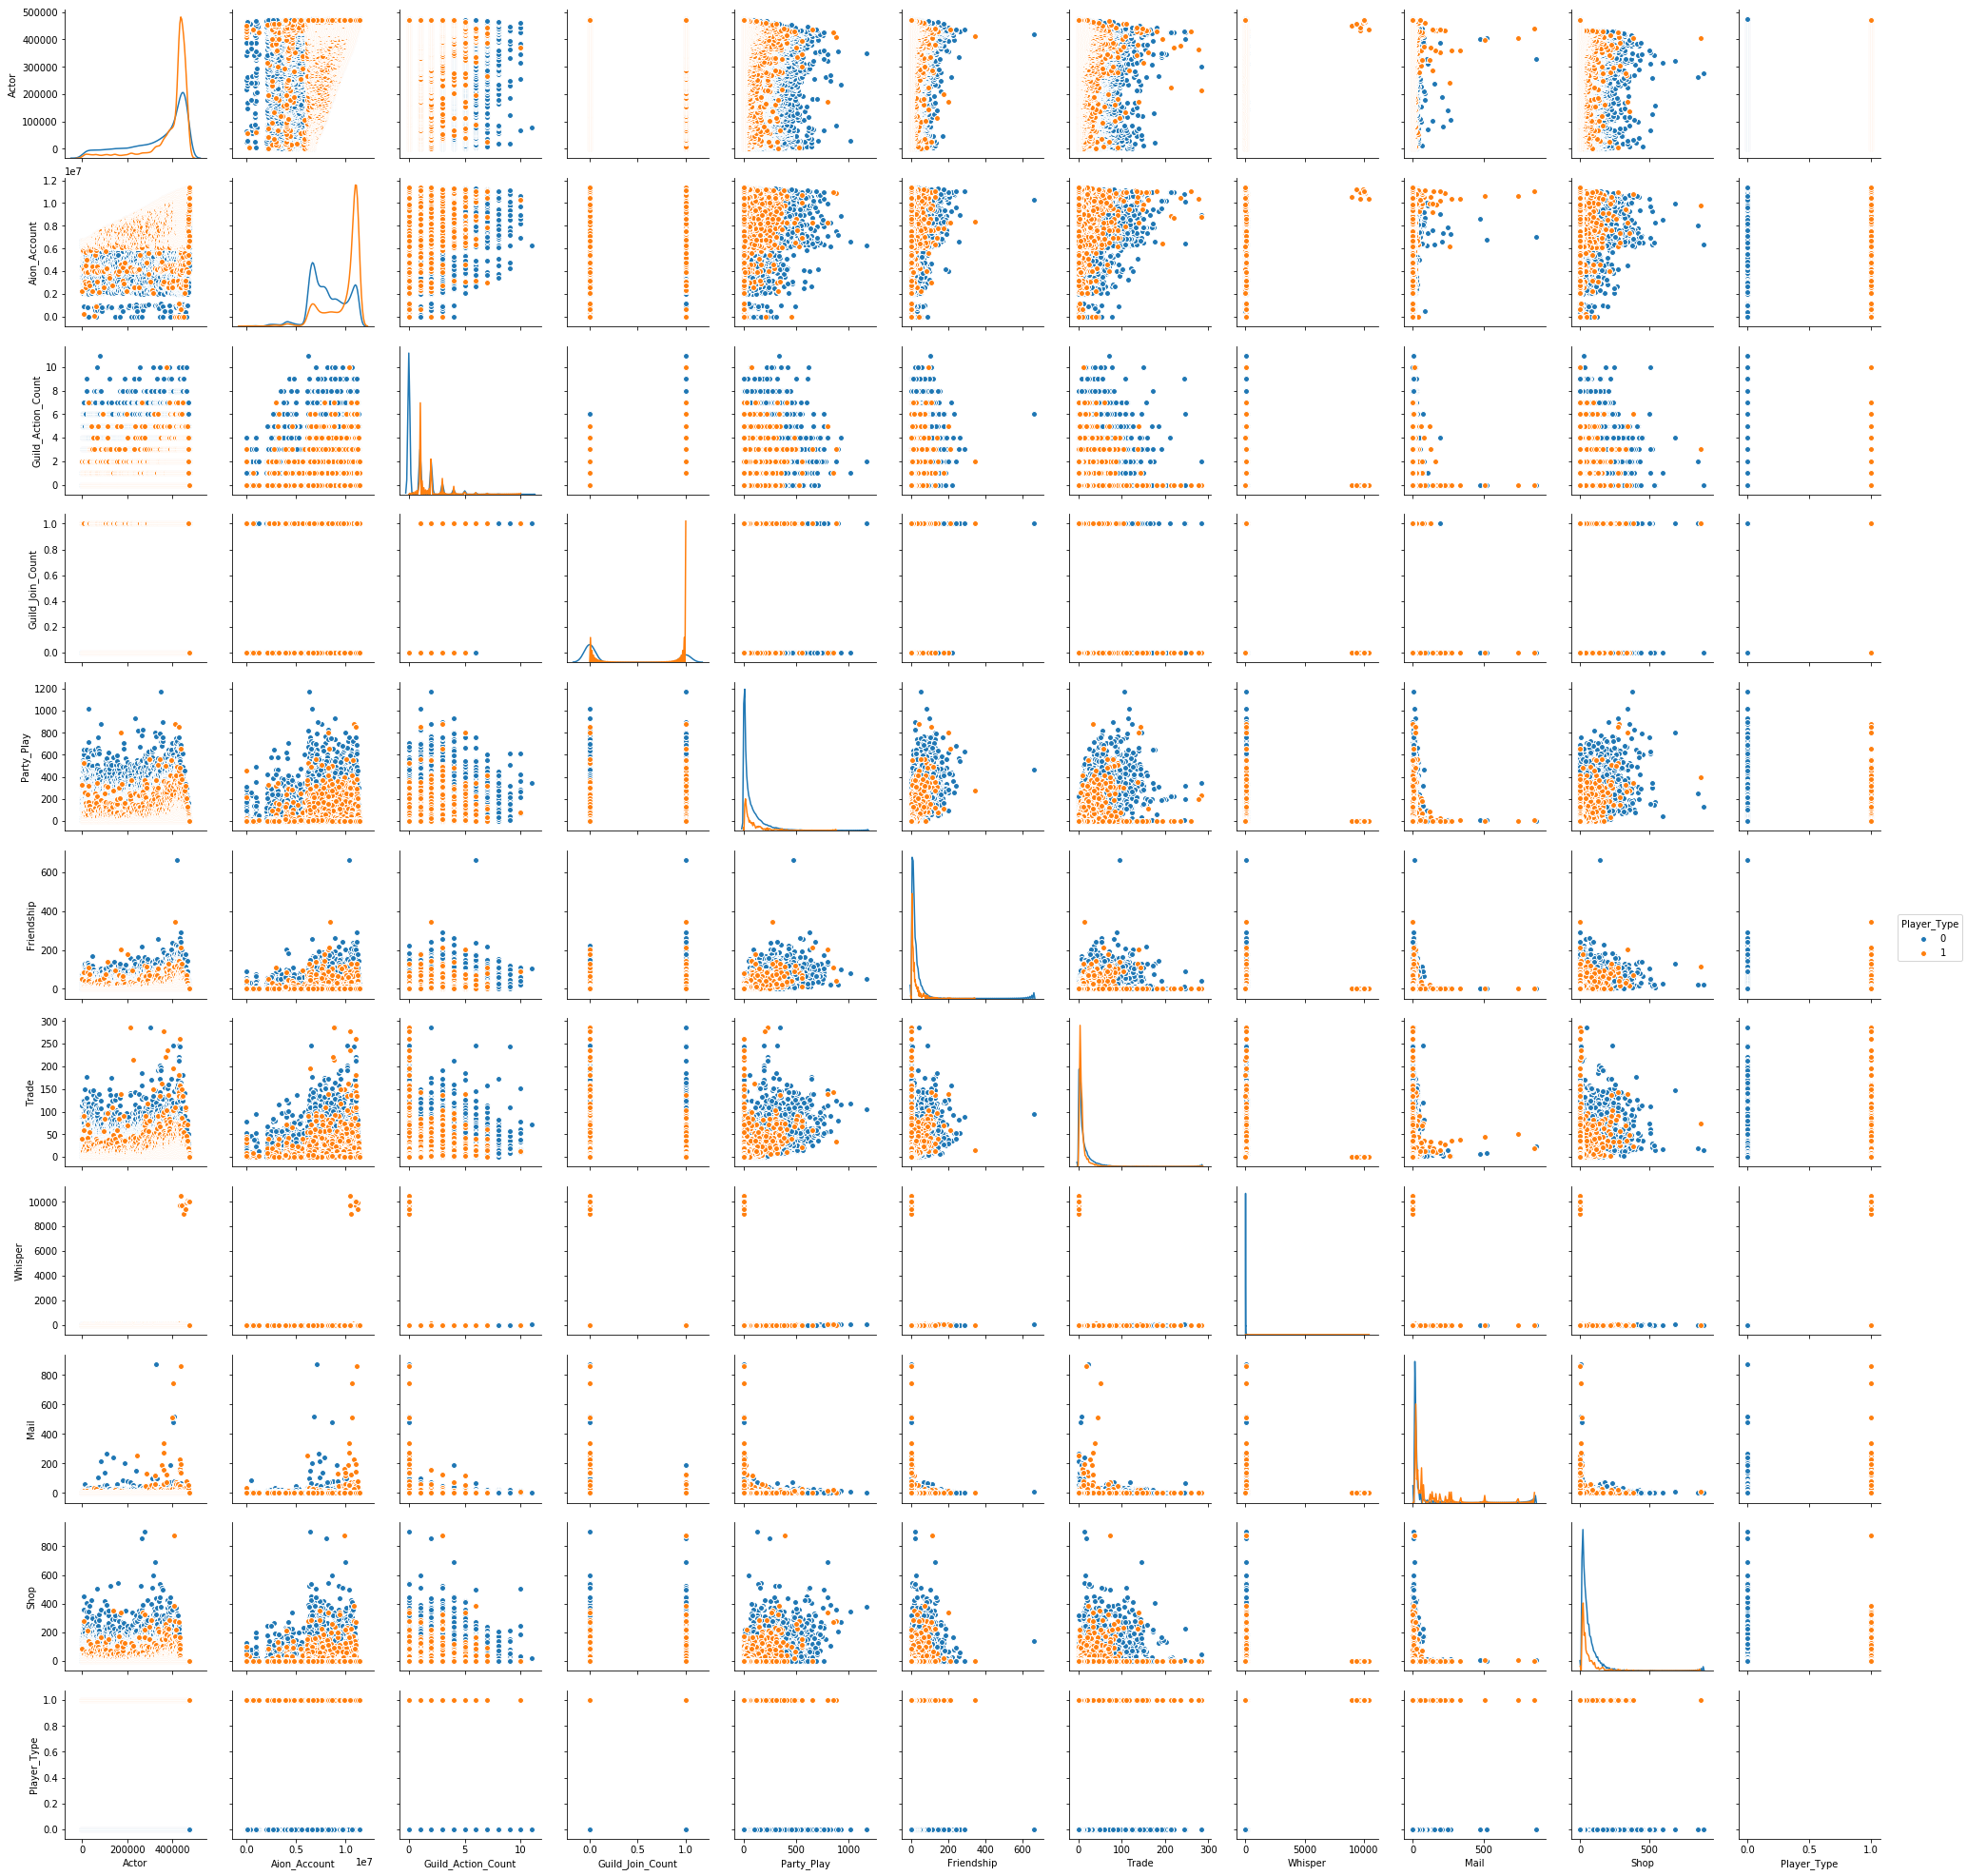

In [10]:
sns.pairplot(scl_intr_df_copy, diag_kind="kde", hue="Player_Type")

# Density Matrix

[['Guild_Action_Count' 'Guild_Join_Count' 'Party_Play' 'Friendship']
 ['Trade' 'Whisper' 'Mail' 'Shop']]


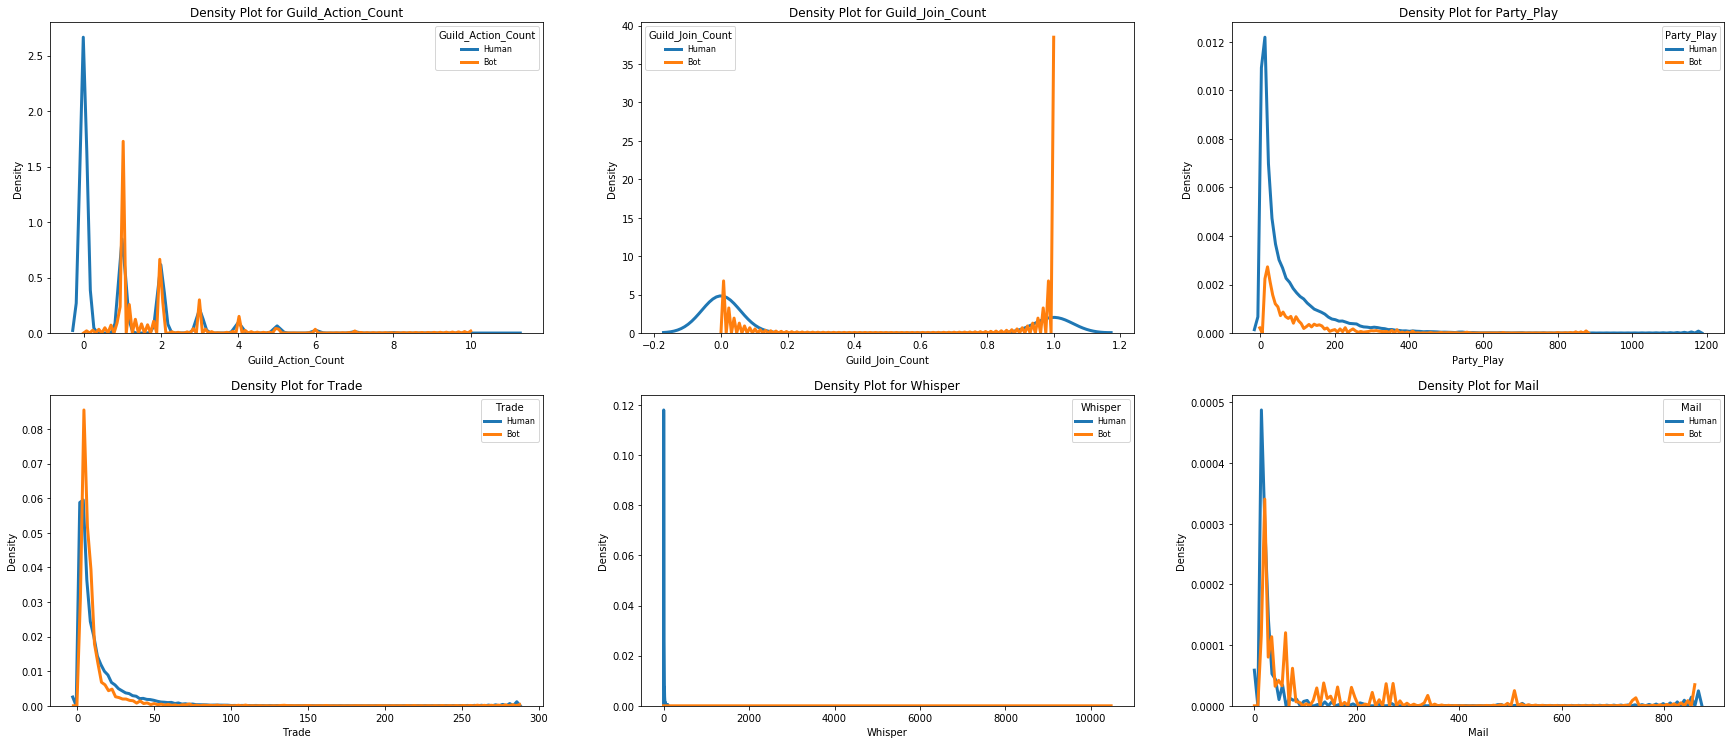

In [11]:
grid_spec = plt.GridSpec(nrows=6, ncols=3, wspace=0.2, hspace=0.2)

cols_to_view = ['Guild_Action_Count', 'Guild_Join_Count','Party_Play','Friendship','Trade','Whisper','Mail',
           'Shop']

cols_to_view_arr = np.array(cols_to_view)
cols_to_view_arr = np.squeeze(cols_to_view_arr)
cols_to_view_matrix = cols_to_view_arr.reshape(2, 4)
print(cols_to_view_matrix)

plt.figure(figsize=(30,40))
for x in range(2):
    for y in range(3):
        col = cols_to_view_matrix[x, y]
        plt.subplot(grid_spec[x, y])
        for player_type in [0, 1]:
            subset = scl_intr_df_copy[scl_intr_df_copy.Player_Type == player_type]
            sns.distplot(subset[col], hist=False, kde=True,
                         kde_kws={'linewidth': 3}, label=type_dict.get(player_type))
        # Plot formatting
        plt.legend(prop={'size': 8}, title = col)
        plt.title('Density Plot for %s' % col)
        plt.xlabel(col)
        plt.ylabel('Density')


# The desity plot above is a very good indicator of the social activities that Bots and Humans Like. The above plot indicates the following:
1. If the actions are less then the Humans like to be part of the Guild and Bots the opposite.
2. The Bots like to Join the guild and perform actions than can benefit them.
3. Party play is something that BOTS do not prefer and Humans Prefer.
4. For Trade Bots and Humans are alike but Bots prefer to Trade more.
5. BOTS do not like to be part of the whisper activity because that does not give them benefit but humans like to enjoy the activity.
6. Mails are something that again humans enjoy more.

# Model selection and Execution

In [12]:
X_cols=['Guild_Action_Count', 'Guild_Join_Count','Party_Play','Friendship','Trade','Whisper','Mail',
           'Shop']
y_col = ['Player_Type']

X = scl_intr_df_copy[X_cols]
y = scl_intr_df_copy[y_col]



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [14]:
results = []
model_names = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))

Running model LR


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
[[12655    17]
 [ 2232    18]]
Overall precision of LR: 0.5142857142857142
Overall recall of LR: 0.008
Overall F1 Score of LR: 0.015754923413566737
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.51      0.01      0.02      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.68      0.50      0.47     14922
weighted avg       0.80      0.85      0.78     14922

Running model LDA
Confusion Matrix: 
[[12655    17]
 [ 2234    16]]
Overall precision of LDA: 0.48484848484848486
Overall recall of LDA: 0.0071111111111111115
Overall F1 Score of LDA: 0.01401664476565922
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.48      0.01      0.01      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.67      0.50   

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


Confusion Matrix: 
[[12216   456]
 [ 1253   997]]
Overall precision of KNN: 0.686166551961459
Overall recall of KNN: 0.4431111111111111
Overall F1 Score of KNN: 0.5384823116392115
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12672
           1       0.69      0.44      0.54      2250

   micro avg       0.89      0.89      0.89     14922
   macro avg       0.80      0.70      0.74     14922
weighted avg       0.87      0.89      0.87     14922

Running model CART
Confusion Matrix: 
[[11650  1022]
 [ 1210  1040]]
Overall precision of CART: 0.504364694471387
Overall recall of CART: 0.4622222222222222
Overall F1 Score of CART: 0.4823747680890538
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     12672
           1       0.50      0.46      0.48      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.71  

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: 
[[12359   313]
 [ 1335   915]]
Overall precision of SVM: 0.745114006514658
Overall recall of SVM: 0.4066666666666667
Overall F1 Score of SVM: 0.5261644623346751
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12672
           1       0.75      0.41      0.53      2250

   micro avg       0.89      0.89      0.89     14922
   macro avg       0.82      0.69      0.73     14922
weighted avg       0.88      0.89      0.88     14922



In [15]:
for model_name, model in models:
    kfold_cv = model_selection.KFold(n_splits=10, random_state=23)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold_cv, scoring='accuracy')
    #print(model_name, cv_results)
    results.append(cv_results)
    model_names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

LR: 0.844770 (0.085194)


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning

LDA: 0.844529 (0.085197)


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anac

KNN: 0.870927 (0.028643)
CART: 0.836166 (0.026869)
NB: 0.842840 (0.082783)

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abhishri\AppData\Local\Continuu

SVM: 0.879753 (0.031886)


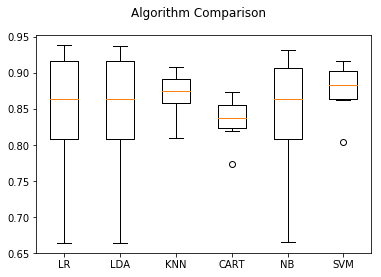

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

# The dataset is converted to a new dataset with Shannon's index represeting social diversity.